# **1. Import Modules**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **2. Import Data**

In [6]:
#import dataset
df = pd.read_csv('Data/data.csv', encoding='windows-1252')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **3. Data Preprocessing**

In [7]:
#convert date column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [11]:
df[df['Quantity'] == -80995].index

Int64Index([540422], dtype='int64')

In [12]:
#Option 1
df_op1 = df.drop(df[df['Quantity'] == -80995].index)

In [16]:
#Option 2
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [18]:
#Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


# **4. Data Visualization**

**Matplotlib**

- 

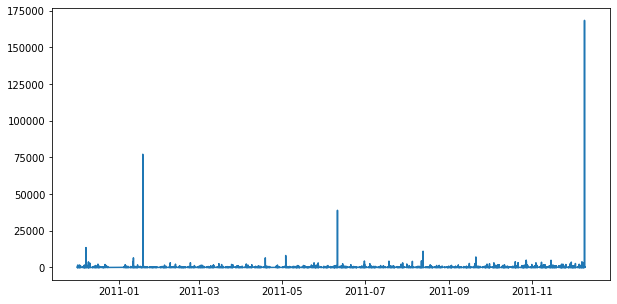

In [20]:
plt.figure(figsize=(10, 5))

#plt.plot(x, y)
plt.plot(df['InvoiceDate'], df['Revenue'])

* Van de: bieu thi theo tung gio, tung ngay nen khong tim duoc insight. Can phai group theo tung ngay

In [22]:
df['date'] = df['InvoiceDate'].dt.date
df['hour'] = df['InvoiceDate'].dt.hour

df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,hour,Date,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,8,2010-12-01,8


In [25]:
df_revenue = df.groupby('date')['Revenue'].sum()
df_revenue 

date
2010-12-01     58960.79
2010-12-02     47748.38
2010-12-03     46943.71
2010-12-05     31774.95
2010-12-06     54830.46
                ...    
2011-12-05     88741.96
2011-12-06     56713.21
2011-12-07     75439.16
2011-12-08     82495.00
2011-12-09    200920.60
Name: Revenue, Length: 305, dtype: float64

In [28]:
df_revenue = pd.DataFrame(df_revenue).reset_index()
df_revenue

,date,Revenue
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-05,31774.95
4,2010-12-06,54830.46
...,...,...
300,2011-12-05,88741.96
301,2011-12-06,56713.21
302,2011-12-07,75439.16
303,2011-12-08,82495.00


Text(0.5, 1.0, 'Total Revenue by Date')

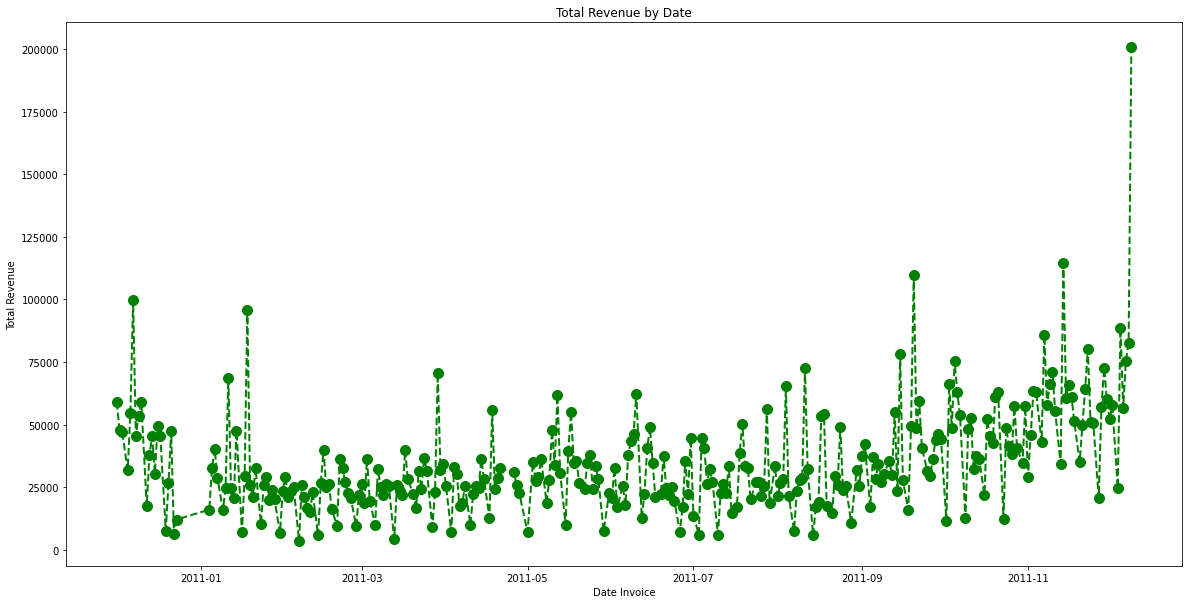

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(df_revenue['date'], df_revenue['Revenue'], c='green', marker='o', linestyle='--', linewidth=2, markersize=10)

plt.xlabel('Date Invoice')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Date')